In [1]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns 
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
r=requests.get('https://www.spe.org/events/en/2019/conference/19rsc/schedule-overview.html#type-ts')

In [3]:
#Realizamos el parsing con  Beautifulsoup

In [4]:
soup = BeautifulSoup(r.text, 'html.parser')

In [5]:
session_number= soup.find_all('span', attrs={'session-number'})

In [6]:
session_number[0].text  # Numero de la sesion

'01'

In [7]:
agenda= soup.find_all('section', attrs={'agenda-item primary-type-ts type-ts type-Technical'})

In [8]:
agenda[0].text.split('\n')[1] # Hora de conferencia

'08:30 - 09:50'

In [9]:
# Nombre de la sesion

agenda[0].text.split('\n')[6].split()[0] + ' ' +  agenda[0].text.split('\n')[6].split()[1]

'Data Analytics'

In [10]:
# Descripción de las sesiones

Desc_ses= soup.find_all('div', attrs={'session-description'})

In [11]:
Desc_ses[2].text

'Probabilistic and robust data-driven methods promise to enable practical prediction and optimization of large-scale energy operations. The development of computationally efficient hybrid approaches that combine models of the underlying physics with data-driven techniques (e.g. reduced order modeling) is essential to delivering good on this promise. The validation of the predictive power and efficacy of such models can pave the path towards ubiquitous adoption.'

In [12]:
# DataFrames sesiones 

In [13]:
Numero=range(1,17)

In [14]:
Numero[1]

2

# DataFrame Sesiones del evento

In [15]:
Number=[]
Sesion_name=[]
Desc=[]
df_sesion=[]
for i in range (16):
    Number=Numero[i]
    Sesion_name=agenda[i].text.split('\n')[6].split()[0] + ' ' +  agenda[i].text.split('\n')[6].split()[1]
    Desc=Desc_ses[i+2].text
    df_sesion.append((Number,Sesion_name,Desc))


In [16]:
df = pd.DataFrame(df_sesion, columns=['Number','Sesion_name','Desc'])
df

,Number,Sesion_name,Desc
0,1,Data Analytics,Probabilistic and robust data-driven methods p...
1,2,Discretization I,This session includes papers on the thermodyna...
2,3,High-Performance Computing,Recent advances in modern parallel computing a...
3,4,"Gridding, Upscaling",This session discusses a number of multiscale ...
4,5,Integrated Modeling,"Poster authors will present, Wednesday and Thu..."
5,6,Geomechanics and,Reservoir simulation often needs to be tailore...
6,7,"Forecasting, Optimization",Geomechanics plays an important role on the ec...
7,8,Complex Processes,Models are built to make predictions and reser...
8,9,Data Assimilation,Increasing energy demand has led to the develo...
9,10,Discretization II,Data assimilation and uncertainty quantificati...


# Extracción de los papers

In [17]:
papers_number= soup.find_all('span', attrs={'paper-number'})   

In [18]:
len(papers_number)  # En total tenemos 104 papers

104

In [19]:
papers_number[0].text # Numero de paper

'193831'

In [20]:
papers_title= soup.find_all('span', attrs={'paper-title'})  

In [21]:
papers_title[0].text# Titulo del paper

'Non-Intrusive Reduced Order Modelling for Reconstruction of Saturation Distributions'

In [22]:
autor_title= soup.find_all('span', attrs={'paper-authors'})  

In [23]:
"".join(autor_title[0].text.split(',')[:-1]) # Autores del paper

'W.J. Kostorz A.H. Muggeridge M.D. Jackson Imperial College London; A. Moncorge'

In [24]:
autor_title[0].text.split(',')[-1]  # Compañia 

' Total E&P UK Ltd'

# Creación del DataFrame Papers

In [25]:
Number_paper=[]
Paper_Title=[]
Autor=[]
company=[]
df_paper=[]
for i in range (104):
    Number_paper=papers_number[i].text
    Paper_Title=papers_title[i].text
    Autor="".join(autor_title[i].text.split(',')[:-1])
    company=autor_title[i].text.split(',')[-1]
    df_paper.append((Number_paper,Paper_Title,Autor,company))

In [26]:
df_paper=pd.DataFrame(df_paper,columns=['Number_paper','Papers_title','Autor','Company'])

In [27]:
df_paper

,Number_paper,Papers_title,Autor,Company
0,193831,Non-Intrusive Reduced Order Modelling for Reco...,W.J. Kostorz A.H. Muggeridge M.D. Jackson Impe...,Total E&P UK Ltd
1,193878,Accelerated Compositional Simulation of Tight ...,S. Wang Colorado School of Mines; N. Sobecki D...,Schlumberger Doll Research Center
2,193904,Data-Driven Discovery of Unconventional Shale ...,H.M. Klie DeepCast; H. Florez,Texas A&M University
3,193912,Deep Model Reduction-Model Learning for Reserv...,J. Zhang S. Cheung Y. Efendiev E. Gildin Texas...,The Chinese University of Hong Kong
4,193848,IOR Pilot Evaluation In Brown-field Fractured ...,J. He M. Hui,Chevron ETC
5,193811,Artificial Neural Network Modeling of Compacti...,E. Fedutenko L.X. Nghiem C. Yang T. Chen M. Seifi,Computer Modelling Group Ltd.
6,193888,Thermodynamic Stability Analysis of Multi-Comp...,S.S. Neshat R. Okuno G.A. Pope,The University of Texas At Austin
7,193906,Flexible Discretizations Of The Three-componen...,L. Cappanera B. Riviere,Rice University
8,193934,Implicit High-Resolution Compositional Simulat...,Ø.S. Klemetsdal O. Møyner Norwegian University...,SINTEF Digital
9,193817,"Von Neumann Stable, Implicit, High Order, Fini...",T.J. Arbogast The University of Texas At Austi...,The University of Texas at Austin


# Top 10 empresas 

In [28]:
df_paper['Company'].value_counts().head(10)

 University of Tulsa                  8
 Colorado School of Mines             6
 Stanford University                  5
 Texas A&M University                 5
 The University of Texas At Austin    5
 Chevron                              4
 University of Calgary                4
 Delft University of Technology       4
 Saudi Aramco PE&D                    4
 Computer Modelling Group Ltd.        3
Name: Company, dtype: int64

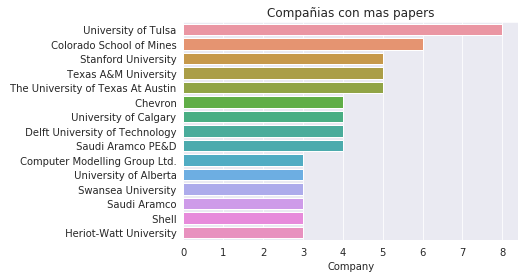

In [29]:
sns.set_style(style='darkgrid')
company=pd.DataFrame(df_paper['Company'].value_counts().head(15))
plt.title('Compañias con mas papers')
sns.barplot(x=company['Company'],y=company.index)

# FINAL....